In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [5]:
# Анализ данных с загрузкой из CSV и построением графиков
def analyze_data(filename='temperature_expert_scores.csv'):
    data = pd.read_csv(filename)

    # Scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='temperature', y='expert_score', data=data, alpha=0.6)
    plt.title("Диаграмма рассеяния оценок в зависимости от температуры")
    plt.xlabel("Температура")
    plt.ylabel("Экспертная оценка")
    plt.grid(True)
    plt.show()

    # Boxplot
    data['temp_range'] = pd.cut(data['temperature'], bins=np.arange(0, 1.1, 0.1))
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='temp_range', y='expert_score', data=data)
    plt.title("Распределение оценок по температурным диапазонам (Boxplot)")
    plt.xlabel("Диапазон температур")
    plt.ylabel("Экспертная оценка")
    plt.grid(True)
    plt.show()

    # Violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='temp_range', y='expert_score', data=data)
    plt.title("Распределение оценок по температурным диапазонам (Violin plot)")
    plt.xlabel("Диапазон температур")
    plt.ylabel("Экспертная оценка")
    plt.grid(True)
    plt.show()

    # Line plot с доверительными интервалами
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='temperature', y='expert_score', data=data, ci='sd', color='red')
    plt.title("Средние оценки с доверительным интервалом")
    plt.xlabel("Температура")
    plt.ylabel("Средняя экспертная оценка")
    plt.grid(True)
    plt.show()

    # Корреляция Пирсона и Спирмена
    pearson_corr, pearson_p = pearsonr(data['temperature'], data['expert_score'])
    spearman_corr, spearman_p = spearmanr(data['temperature'], data['expert_score'])

    print(f"Корреляция Пирсона: {pearson_corr:.4f} (p-value: {pearson_p:.4f})")
    print(f"Корреляция Спирмена: {spearman_corr:.4f} (p-value: {spearman_p:.4f})")

    # Определение оптимального диапазона
    mean_scores = data.groupby('temp_range')['expert_score'].mean()
    optimal_range = mean_scores.idxmax()
    print(f"Оптимальный диапазон температуры: {optimal_range}")



Данные сохранены в файл temperature_expert_scores.csv


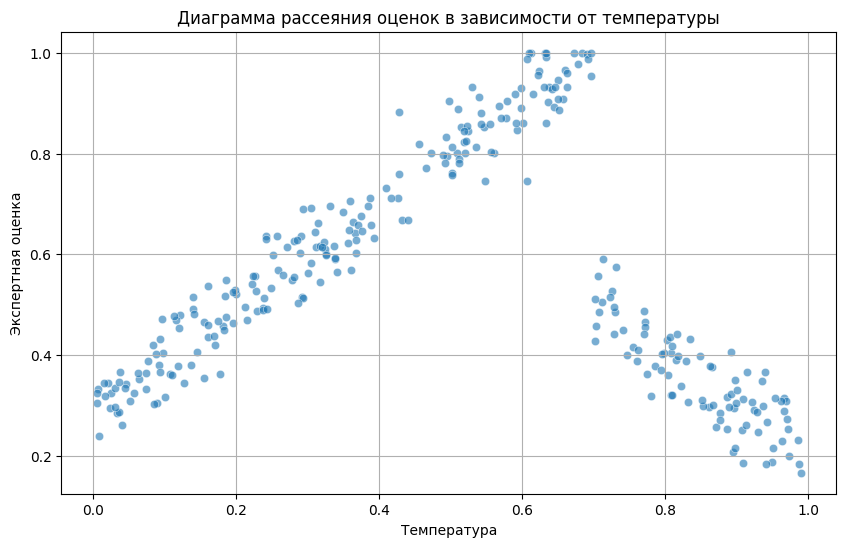

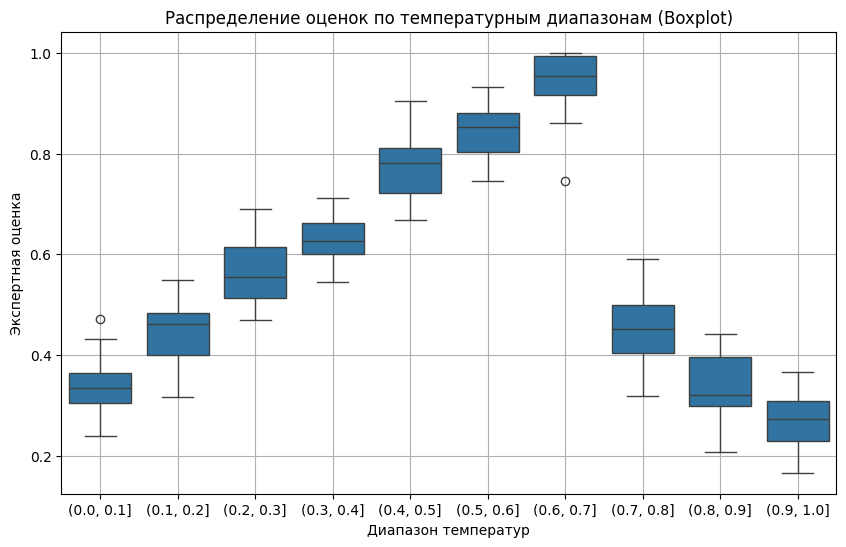

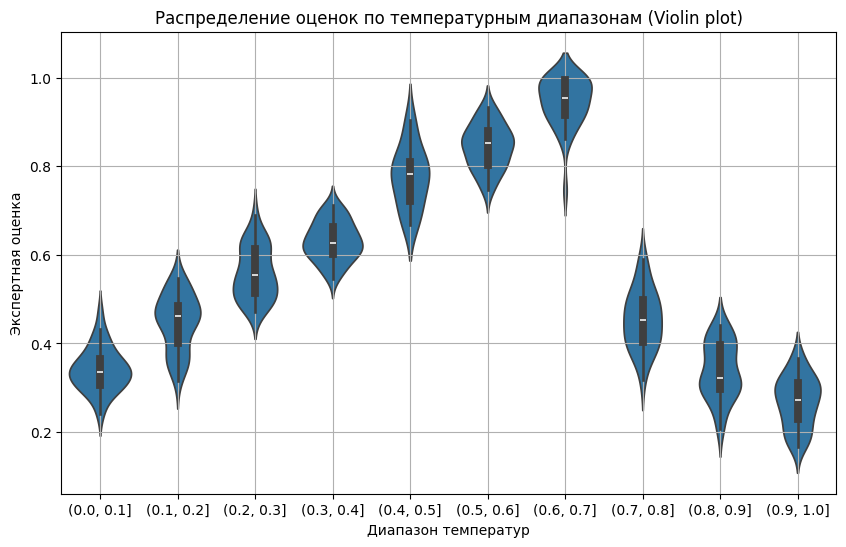

/tmp/ipykernel_3223571/1528345329.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='temperature', y='expert_score', data=data, ci='sd', color='red')


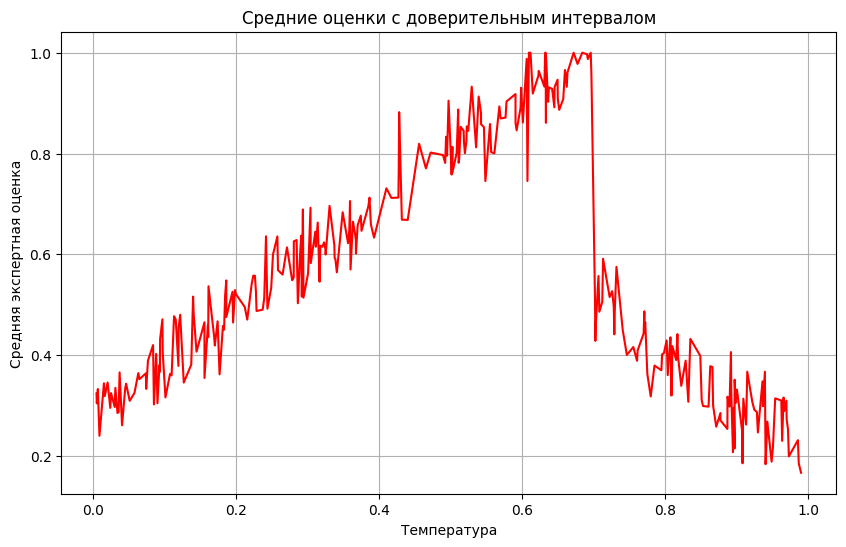

Корреляция Пирсона: -0.0414 (p-value: 0.4749)
Корреляция Спирмена: -0.1154 (p-value: 0.0458)
Оптимальный диапазон температуры: (0.6, 0.7]


/tmp/ipykernel_3223571/1528345329.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = data.groupby('temp_range')['expert_score'].mean()


In [6]:
#Выполнение
generate_test_data()
analyze_data()